In [46]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os 
import os.path as osp
import numpy as np
import sys

sys.path.insert(0, '../tools')
import _init_paths
from pycocotools.coco import COCO
from pycocotools import mask as COCOmask

from scipy.misc import imread, imresize

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load coco annotations
IMAGE_DIR = '../data/coco/images/val2014/'
annotation_file = '../data/coco/annotations/instances_minival2014.json'
coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.65s)
creating index...
index created!


In [4]:
# let's check one ann
ann_ids = coco.getAnnIds()

## check one object

uint8 (480, 640)


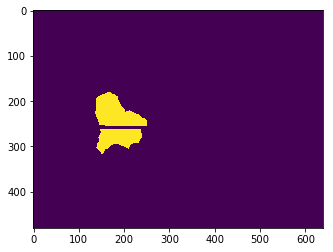

In [64]:
ix = 16
ann_id = ann_ids[ix]
ann = coco.loadAnns([ann_id])[0]
m = coco.annToMask(ann)
plt.imshow(m)
print(m.dtype, m.shape)

In [69]:
type(ann['segmentation']), len(ann['segmentation'])

(list, 2)

## check imresize

In [67]:
# imresize outputs uint8 [0, 1]
m = imresize(mask, [224, 224])
print(m.dtype, m.max(), m.min(), set(m.reshape(-1).tolist()))
print(m.shape)

uint8 1 0 set([0, 1])
(224, 224)


## what if we use wrong im_height and im_width

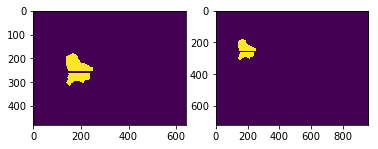

In [71]:
img = coco.loadImgs(ann['image_id'])[0]
h, w = img['height'], img['width']
plt.figure()
# original image size
plt.subplot(121)
rles = COCOmask.frPyObjects(ann['segmentation'], h, w)
rle = COCOmask.merge(rles)
m = COCOmask.decode(rle)
plt.imshow(m)
# double image size
plt.subplot(122)
rles = COCOmask.frPyObjects(ann['segmentation'], h*1.5, w*1.5)
rle = COCOmask.merge(rles)
m = COCOmask.decode(rle)
plt.imshow(m)